In [84]:
import torch
from torchvision import transforms
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
import matplotlib.pyplot as plt



In [97]:
image_path = 'dataset/animal/bird.jpg' 
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [98]:
model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]

In [99]:
input_tensor = preprocess(image).unsqueeze(0)  

In [100]:
cam = GradCAM(model=model, target_layers=target_layers)

In [101]:
output = model(input_tensor)
target_category = output.argmax().item()
targets=[ClassifierOutputTarget(target_category)]

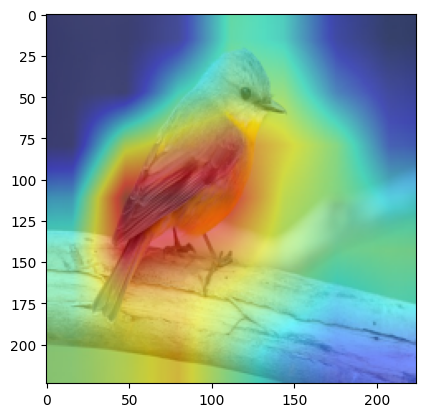

In [102]:
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
if len(grayscale_cam.shape) > 2:
    grayscale_cam = grayscale_cam[0, :]  # 첫 번째 이미지만 사용

# 이미지를 NumPy 배열로 변환
rgb_img = input_tensor[0].detach().cpu().permute(1, 2, 0).numpy()
rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())  # 0-1 범위로 정규화

# CAM 이미지 생성
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# 이미지 표시
plt.imshow(visualization)
plt.show()